# Exploración de archivos CSV usando Python

Este código realiza una serie de pasos para la exploración inicial de dos conjuntos de datos en formato CSV:

1. **Cargar archivos CSV**: 
   - Se cargan los archivos `"extract - fees - data analyst - .csv"` y `"extract - cash request - data analyst.csv"` en dos *DataFrames* separados llamados `data_fees` y `data`.

2. **Explorar la forma de las bases de datos**:
   - Se utiliza el método `shape` para obtener el número de filas y columnas de cada archivo, lo que permite entender su tamaño y estructura general.

3. **Explorar la información de los archivos**:
   - El método `info()` se utiliza para revisar el tipo de datos de cada columna, verificar si hay valores nulos, y revisar la memoria que ocupan.

4. **Describir las estadísticas de los archivos**:
   - Con el método `describe()`, se generan estadísticas descriptivas de las columnas numéricas, proporcionando métricas como media, desviación estándar, valores mínimos y máximos, entre otros.

5. **Obtener los nombres de las columnas**:
   - Se extraen los nombres de las columnas de ambos archivos usando `columns.tolist()` para verificar qué información contiene cada archivo.


In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr

# Cargar archivo "extract - fees - data analyst - .csv"
data_fees = pd.read_csv("extract - fees - data analyst - .csv")

# Cargar archivo "extract - cash request - data analyst.csv"
data = pd.read_csv("extract - cash request - data analyst.csv")

# Explorar la forma de las bases de dato "extract - fees - data analyst - .csv" y "extract - cash request - data analyst.csv"
print(data_fees.shape)
print(data.shape)

(21061, 13)
(23970, 16)


In [80]:
# Explorar el archivo "extract - cash request - data analyst.csv"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [82]:
# Explorar el archivo "extract - fees - data analyst - .csv"
data_fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [84]:
# Explorar el archivo "extract - cash request - data analyst.csv" con Describe
data.describe()

,id,amount,user_id,deleted_account_id
count,23970.000000,23970.000000,21867.000000,2104.000000
mean,13910.966124,82.720818,32581.250789,9658.755228
std,7788.117214,26.528065,27618.565773,7972.743249
min,3.000000,1.000000,34.000000,91.000000
25%,7427.250000,50.000000,10804.000000,3767.000000
50%,14270.500000,100.000000,23773.000000,6121.500000
75%,20607.750000,100.000000,46965.000000,16345.000000
max,27010.000000,200.000000,103719.000000,30445.000000


In [86]:
# Explorar el archivo "extract - fees - data analyst - .csv" con Describe
data_fees.describe()

,id,cash_request_id,total_amount
count,21061.000000,21057.000000,21061.000000
mean,10645.355111,16318.449162,5.000237
std,6099.315256,6656.149949,0.034453
min,1.000000,1456.000000,5.000000
25%,5385.000000,11745.000000,5.000000
50%,10652.000000,17160.000000,5.000000
75%,15925.000000,21796.000000,5.000000
max,21193.000000,27010.000000,10.000000


In [88]:
# Explorar el nombre de las columnas del archivo "extract - cash request - data analyst.csv"
cash_headers = data.columns.tolist()
cash_headers

['id',
 'amount',
 'status',
 'created_at',
 'updated_at',
 'user_id',
 'moderated_at',
 'deleted_account_id',
 'reimbursement_date',
 'cash_request_received_date',
 'money_back_date',
 'transfer_type',
 'send_at',
 'recovery_status',
 'reco_creation',
 'reco_last_update']

In [90]:
# Explorar el nombre de las columnas del archivo "extract - fees - data analyst - .csv"
fees_headers = data_fees.columns.tolist()
fees_headers

['id',
 'cash_request_id',
 'type',
 'status',
 'category',
 'total_amount',
 'reason',
 'created_at',
 'updated_at',
 'paid_at',
 'from_date',
 'to_date',
 'charge_moment']

### Frecuencia de Uso del Servicio - Parte 1

Este script realiza las siguientes operaciones en el dataset **"extract - cash request - data analyst.csv"**:

1. **Librerías Importadas**: 
   - `numpy`, `pandas`, `matplotlib.pyplot`, `seaborn`, y `warnings`.
   
2. **Cargar Datos**: 
   - El archivo CSV "extract - cash request - data analyst.csv" se carga en un DataFrame de pandas.

3. **Rellenar Valores Faltantes en `user_id`**: 
   - El script rellena los valores faltantes en la columna `user_id` con los valores correspondientes de la columna `deleted_account_id`.

4. **Convertir `created_at` a Datetime**: 
   - Convierte la columna `created_at` al formato datetime para un análisis adecuado basado en el tiempo.

5. **Mostrar Datos**: 
   - Imprime las primeras filas del dataset usando `data.head()`.



In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr

# Cargar archivo "extract - cash request - data analyst.csv"
data = pd.read_csv("extract - cash request - data analyst.csv")

# Traer valores de la columna "deleted_account_id" a las celdas correspondientes de la columna "user_id"
data['user_id'] = data['user_id'].fillna(data['deleted_account_id'])

# Convertir 'created_at' al formato datetime para un análisis adecuado basado en el tiempo
data['created_at'] = pd.to_datetime(data['created_at'])

#Imprimir el emcabezado del dataset "data"
data.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


### Frecuencia de Uso del Servicio - Parte 2

Este script realiza los siguientes pasos para un análisis de cohortes en el dataset:

1. **Determinar la Fecha de la Primera Solicitud (Cohorte)**: 
   - Agrupa los datos por `user_id` y selecciona la fecha mínima de `created_at` para determinar la fecha de la primera solicitud por usuario (cohorte).

2. **Seleccionar las Columnas `user_id` y `cohort`**: 
   - Renombra las columnas seleccionadas como `user_id` y `cohort`.

3. **Mostrar los Datos**: 
   - Imprime las primeras filas del DataFrame con los datos de cohortes usando `user_cohort.head()`.



In [96]:
# Para el análisis de cohortes, determinar la fecha de la primera solicitud (cohorte) por usuario.
user_cohort = data.groupby('user_id')['created_at'].min().reset_index()

# Seleccionar las columnas "uder_id" y "cohort"
user_cohort.columns = ['user_id', 'cohort']

#Imprimir el emcabezado
user_cohort.head()

,user_id,cohort
0,34.0,2020-04-20 15:50:21.187257+00:00
1,35.0,2019-12-13 20:27:38.106778+00:00
2,47.0,2019-11-19 13:57:53.511561+00:00
3,52.0,2019-12-17 09:01:12.584634+00:00
4,53.0,2019-12-21 11:39:03.844436+00:00


### Frecuencia de Uso del Servicio - Parte 3

Este script realiza los siguientes pasos para fusionar información en el dataset:

1. **Fusionar la Información de la Cohorte**: 
   - Une la información de la cohorte del DataFrame `user_cohort` al conjunto de datos principal `data` utilizando `user_id` como clave de unión y uniendo de manera izquierda.

2. **Mostrar los Datos**: 
   - Imprime las primeras filas del conjunto de datos resultante usando `data.head()`.



In [99]:
# Merge la información de la cohorte de nuevo "user_cohort" al conjunto de datos principal "extract - cash request - data
data = pd.merge(data, user_cohort, on='user_id', how='left')

#Imprimir el emcabezado
data.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:05:21.596873+00:00
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:50:12.347780+00:00
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:13:35.825460+00:00
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:16:10.880172+00:00
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-05-06 09:59:38.877376+00:00


### Frecuencia de Uso del Servicio - Parte 4

Este script realiza los siguientes pasos para agregar nuevas columnas al conjunto de datos:

1. **Agregar Nuevas Columnas**: 
   - Se crean dos nuevas columnas, `cohort_month` y `request_month`, que transforman las columnas `cohort` y `created_at` al formato `yyyy-mm`.

2. **Mostrar los Datos**: 
   - Imprime las primeras filas del conjunto de datos resultante usando `data.head()`.

In [102]:
# Agregar nuevas columnas con un formato yyyy-mm para las columnas 'cohort' y 'created_at'
data['cohort_month'] = data['cohort'].dt.to_period('M')
data['request_month'] = data['created_at'].dt.to_period('M')

data.head()

C:\Users\Davi\AppData\Local\Temp\ipykernel_6216\3352207740.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['cohort_month'] = data['cohort'].dt.to_period('M')
C:\Users\Davi\AppData\Local\Temp\ipykernel_6216\3352207740.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['request_month'] = data['created_at'].dt.to_period('M')


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort,cohort_month,request_month
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:05:21.596873+00:00,2019-12,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:50:12.347780+00:00,2019-12,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:13:35.825460+00:00,2019-12,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:16:10.880172+00:00,2019-12,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-05-06 09:59:38.877376+00:00,2020-05,2020-05


### Frecuencia de Uso del Servicio - Parte 5

Este script realiza los siguientes pasos para contar las solicitudes de los usuarios:

1. **Contar Solicitudes por Usuario**: 
   - Agrupa los datos por `user_id`, `cohort_month` y `request_month`, y cuenta el número de solicitudes, almacenando el resultado en la columna `request_count`.

2. **Mostrar los Datos**: 
   - Imprime las primeras filas del DataFrame resultante usando `user_request_frequency.head()`.

In [105]:
# Contar el número de solicitudes por usuario por mes desde su cohorte.
user_request_frequency = data.groupby(['user_id', 'cohort_month', 'request_month']).size().reset_index(name='request_count')

#Imprimir el emcabezado
user_request_frequency.head()

,user_id,cohort_month,request_month,request_count
0,34.0,2020-04,2020-04,1
1,35.0,2019-12,2019-12,2
2,35.0,2019-12,2020-01,1
3,35.0,2019-12,2020-02,1
4,35.0,2019-12,2020-03,1


### Frecuencia de Uso del Servicio - Parte 6 (Grafico)

Este script realiza los siguientes pasos para crear un mapa de calor para el análisis de cohortes:

1. **Pivotar los Datos**: 
   - Se utiliza una tabla dinámica para reorganizar los datos, creando una estructura de mapa de calor donde `cohort_month` es el índice, `request_month` son las columnas, y `request_count` es el valor, utilizando la suma como función de agregación y llenando los valores faltantes con 0.

2. **Graficar el Heatmap**: 
   - Se genera un mapa de calor utilizando la biblioteca Seaborn, donde se especifican el tamaño de la figura, la paleta de colores, y se añaden anotaciones con los conteos. Se incluyen títulos y etiquetas para los ejes.



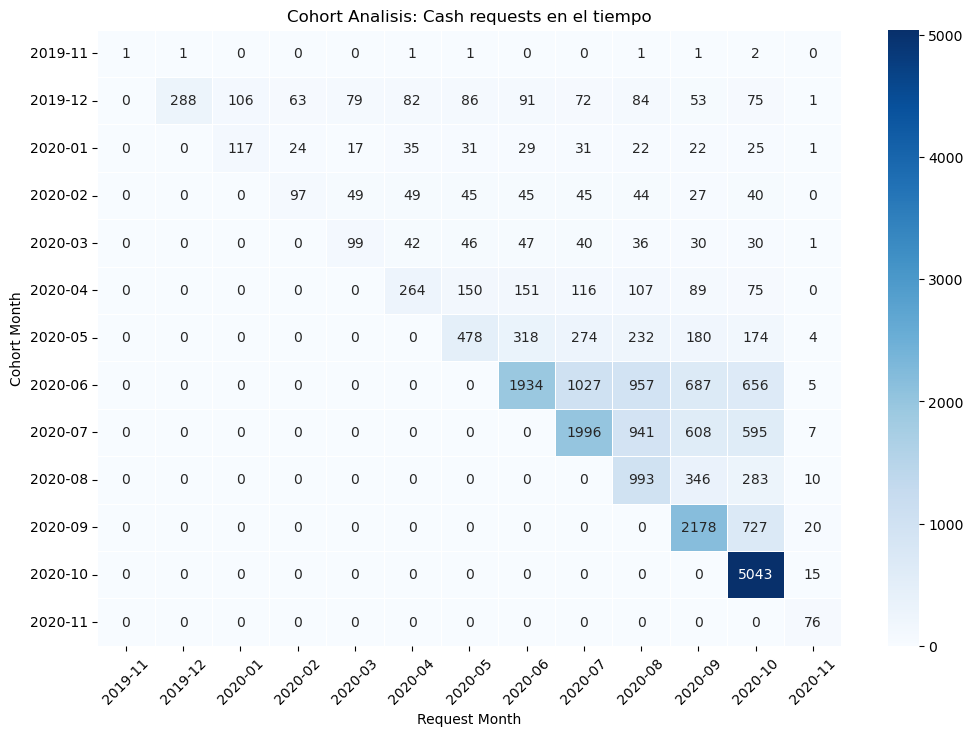

In [108]:
#Pivotar los datos para crear una estructura de mapa de calor de cohortes por mes de solicitud
cohort_pivot = user_request_frequency.pivot_table(
    index='cohort_month', columns='request_month', values='request_count', aggfunc='sum', fill_value=0
)

# Plot el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, cmap="Blues", annot=True, fmt="d", linewidths=.5)
plt.title("Cohort Analisis: Cash requests en el tiempo")
plt.xlabel("Request Month")
plt.ylabel("Cohort Month")
plt.xticks(rotation=45)
plt.show()

### Frecuencia de Uso del Servicio - Parte 7 (Grafico)

Este script realiza los siguientes pasos para crear un análisis de cohortes visualizado en un gráfico de líneas:

1. **Pivotar los Datos**: 
   - Se crea una tabla dinámica para reorganizar los datos, donde `cohort_month` es el índice, `request_month` son las columnas, y `request_count` es el valor, utilizando la suma como función de agregación y llenando los valores faltantes con 0.

2. **Reiniciar el Índice**: 
   - Se reinicia el índice de la tabla pivotada para convertir `cohort_month` en una columna, facilitando su graficación.

3. **Derretir los Datos**: 
   - Se derriten los datos pivotados para crear un formato largo, lo que facilita la creación de gráficos.

4. **Convertir Tipos de Datos**: 
   - Se convierte `request_month` a cadena y `request_count` a numérico según sea necesario.

5. **Graficar el Gráfico de Líneas**: 
   - Se genera un gráfico de líneas utilizando la biblioteca Seaborn, especificando el tamaño de la figura y añadiendo títulos y etiquetas para los ejes.

6. **Mostrar la Gráfica**: 
   - Se ajusta el diseño para mostrar correctamente la gráfica.



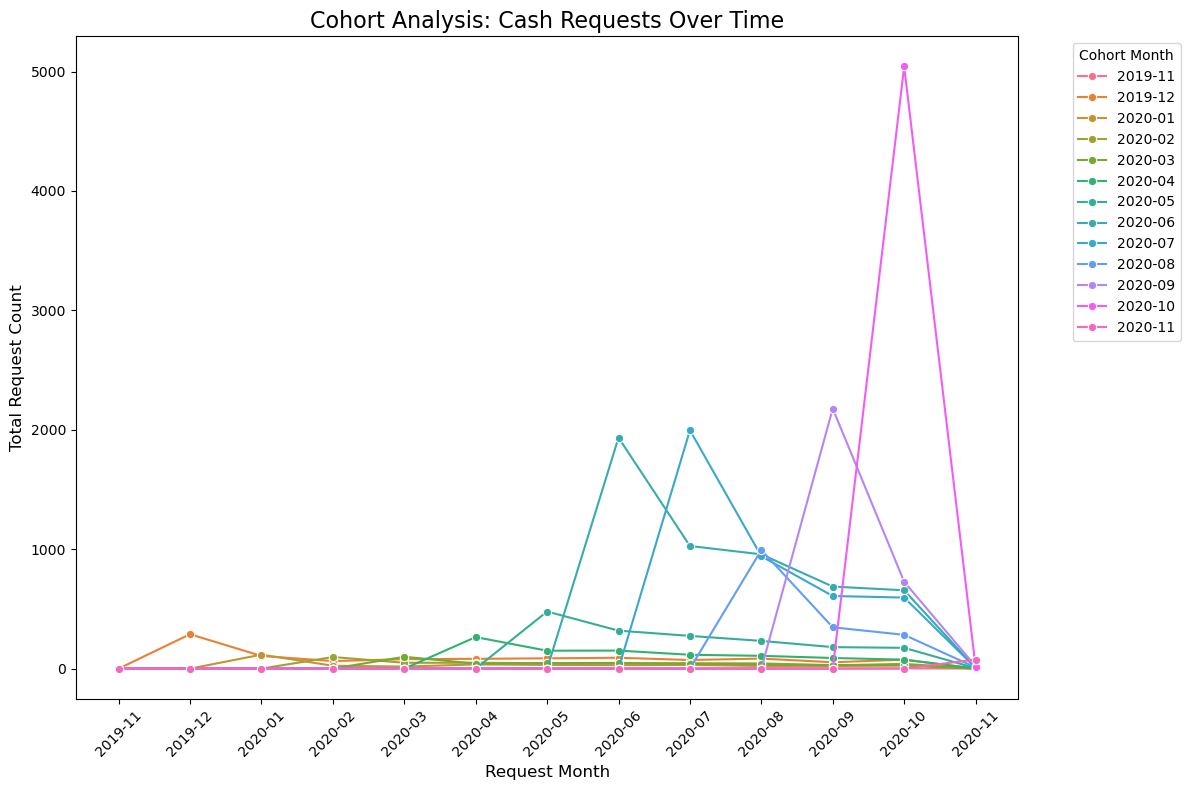

In [110]:
# Pivotar los datos para crear una tabla de cohortes por mes de solicitud
cohort_pivot = user_request_frequency.pivot_table(
    index='cohort_month', columns='request_month', values='request_count', aggfunc='sum', fill_value=0
)

# Reiniciar el índice para que cohort_month se convierta en una columna para graficar
cohort_pivot_reset = cohort_pivot.reset_index()

# Derretir los datos pivotados para facilitar la graficación
cohort_melted = cohort_pivot_reset.melt(id_vars='cohort_month', var_name='request_month', value_name='request_count')

# Convertir request_month a cadena y request_count a numérico (si es necesario)
cohort_melted['request_month'] = cohort_melted['request_month'].astype(str)
cohort_melted['request_count'] = pd.to_numeric(cohort_melted['request_count'], errors='coerce')

# Graficar el gráfico de líneas usando seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=cohort_melted, x='request_month', y='request_count', hue='cohort_month', marker='o')

# Agregar títulos y etiquetas
plt.title('Cohort Analysis: Cash Requests Over Time', fontsize=16)
plt.xlabel('Request Month', fontsize=12)
plt.ylabel('Total Request Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Cohort Month', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


### Frecuencia de Uso del Servicio - Parte 8 (Grafico)

Este script realiza los siguientes pasos para crear una tabla de cohortes y graficar el análisis de solicitudes en el tiempo:

1. **Pivotar los Datos**: 
   - Se crea una tabla dinámica para estructurar los datos de solicitudes, utilizando `cohort_month` como índice, `request_month` como columnas y `request_count` como valores, sumando los conteos y llenando los valores faltantes con 0.

2. **Reiniciar el Índice**: 
   - Se reinicia el índice de la tabla pivotada para que `cohort_month` se convierta en una columna, facilitando su uso en gráficas.

3. **Derretir los Datos**: 
   - Se transforma la tabla pivotada a un formato largo para simplificar la visualización.

4. **Convertir Tipos de Datos**: 
   - Se convierte `request_month` a formato de cadena y `request_count` a tipo numérico, según sea necesario.

5. **Graficar el Gráfico de Líneas**: 
   - Se utiliza la biblioteca Seaborn para crear un gráfico de líneas que muestra la cantidad total de solicitudes a lo largo del tiempo, diferenciadas por mes de cohorte.

6. **Agregar Títulos y Etiquetas**: 
   - Se incluyen títulos y etiquetas para los ejes del gráfico, y se ajusta el diseño para una presentación adecuada.

7. **Mostrar la Gráfica**: 
   - Finalmente, se muestra la gráfica ajustada.



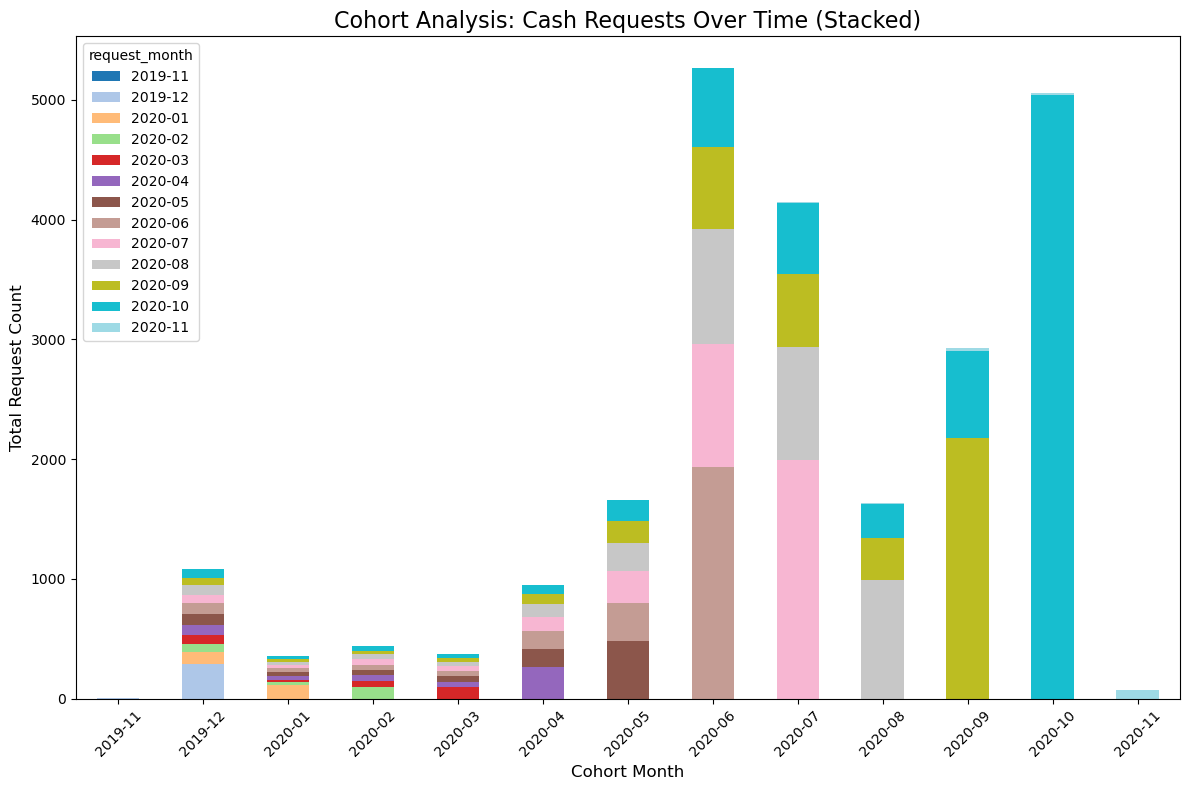

In [113]:
# Pivot the data to create a cohort by request_month table
cohort_pivot = user_request_frequency.pivot_table(
    index='cohort_month', columns='request_month', values='request_count', aggfunc='sum', fill_value=0
)
# Plot the stacked bar plot
cohort_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
# Add titles and labels
plt.title('Cohort Analysis: Cash Requests Over Time (Stacked)', fontsize=16)
plt.xlabel('Cohort Month', fontsize=12)
plt.ylabel('Total Request Count', fontsize=12)
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()
plt.show()

### Tasa de Incidentes - Parte 1

Este script realiza los siguientes pasos para cargar un segundo archivo y preparar los datos para su análisis:

1. **Cargar el Segundo Archivo**: 
   - Se carga un archivo CSV que contiene datos sobre tarifas usando `pd.read_csv()`.

2. **Renombrar la Columna 'id'**: 
   - Se renombra la columna `'id'` a `'cash_request_id'` en el conjunto de datos principal para que coincida con la clave que se utilizará para la fusión de datos.

3. **Mostrar los Datos**: 
   - Se imprimen las primeras filas del conjunto de datos usando `data.head()` para verificar la carga y el renombramiento de columnas.



In [117]:
# Cargar archivo "extract - fees - data analyst - .csv"
data_fees = pd.read_csv("extract - fees - data analyst - .csv")

# Renaming 'id' to 'cash_request_id' in the main dataset to match the key for merging
# data = pd.read_csv("extract - cash request - data analyst.csv")
data = data.rename(columns={'id': 'cash_request_id'})

data.head()


,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort,cohort_month,request_month
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:05:21.596873+00:00,2019-12,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:50:12.347780+00:00,2019-12,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:13:35.825460+00:00,2019-12,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:16:10.880172+00:00,2019-12,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-05-06 09:59:38.877376+00:00,2020-05,2020-05


### Tasa de Incidentes - Parte 2

Este script realiza los siguientes pasos para fusionar dos conjuntos de datos:

1. **Fusión de Conjuntos de Datos**: 
   - Se fusionan los conjuntos de datos `data_fees` y `data` utilizando un `left join` sobre la columna `'cash_request_id'`. Esto asegura que se conserven todas las filas del conjunto de datos principal (`data_fees`) y se agreguen las correspondientes del segundo conjunto de datos (`data`).

2. **Mostrar los Datos Fusionados**: 
   - Se imprimen las primeras filas del conjunto de datos fusionado usando `data_merged.head()` para verificar el resultado de la fusión.



In [119]:
# Merging the datasets on 'cash_request_id' using a left join
data_merged = pd.merge(data_fees, data, on='cash_request_id', how='left')

# Displaying the first few rows of the merged dataset 
data_merged.head()

,id,cash_request_id,type,status_x,category,total_amount,reason,created_at_x,updated_at_x,paid_at,...,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort,cohort_month,request_month
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,...,NaN,2020-10-06 22:00:00+00,instant,2020-09-14 10:46:57.735172+00,pending,2020-10-11 22:52:52.274832+00,2020-12-20 22:40:42.556534+00,2020-09-07 10:46:57.780263+00:00,2020-09,2020-09
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,...,2020-08-12,2020-12-02 03:02:41.180953+00,instant,2020-08-17 13:15:54.290998+00,completed,2020-09-09 20:51:17.992852+00,2020-10-10 22:58:13.306027+00,2020-06-21 18:38:39.791418+00:00,2020-06,2020-08
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,...,2020-10-27,2020-11-04 19:34:37.399122+00,instant,2020-10-23 10:10:52.894637+00,NaN,NaN,NaN,2020-10-23 10:10:43.278601+00:00,2020-10,2020-10
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,...,2020-11-03,2020-11-17 23:00:00+00,instant,2020-10-31 15:46:46.846335+00,NaN,NaN,NaN,2020-10-31 15:46:14.156730+00:00,2020-10,2020-10
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,...,2020-10-09,2020-11-02 14:45:20.315696+00,instant,2020-10-13 00:40:23.983346+00,completed,2020-10-24 22:43:13.278707+00,2020-11-02 14:45:20.333109+00,2020-06-27 18:06:04.818312+00:00,2020-06,2020-10


### Tasa de Incidentes - Parte 3

Este script realiza los siguientes pasos para analizar datos relacionados con incidentes en el conjunto de datos fusionado:

1. **Filtrar Datos por Tipo**: 
   - Se filtran los datos en la columna `"Type"` para mostrar únicamente los registros de tipo `"Incident"` y se cuenta cuántos incidentes hay en total.

2. **Contar Transacciones Totales**: 
   - Se cuenta el número total de líneas en la columna `"Type"` para determinar la cantidad de transacciones registradas.

3. **Calcular la Tasa de Incidentes**: 
   - Se calcula el porcentaje de incidentes respecto al total de transacciones utilizando la fórmula: \((\text{número de incidentes} / \text{número total de transacciones}) \times 100\).

4. **Convertir a Formato Datetime**: 
   - Se convierte la columna `'created_at_x'` a formato datetime para facilitar el análisis basado en el tiempo.

5. **Mostrar Datos**: 
   - Se imprimen las primeras filas del conjunto de datos fusionado usando `data_merged.head()` para verificar el resultado de las conversiones y filtros.



In [123]:
#Filter data in column "Type" to show "Incident" only and count how many they are
number_incidents = data_merged["type"].value_counts()["incident"]
number_incidents

2196

In [125]:
# count how many lines is there total.
number_transactions = data_merged["type"].count()
number_transactions

21061

In [127]:
# calculate the percentage between incident number and total transactions
tasa_incident_global = (number_incidents/number_transactions)*100

tasa_incident_global

10.42685532500831

In [129]:
# Convert 'created_at' to datetime format for proper time-based analysis
data_merged['created_at_x'] = pd.to_datetime(data_merged['created_at_x'])

data_merged.head()

,id,cash_request_id,type,status_x,category,total_amount,reason,created_at_x,updated_at_x,paid_at,...,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort,cohort_month,request_month
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,...,NaN,2020-10-06 22:00:00+00,instant,2020-09-14 10:46:57.735172+00,pending,2020-10-11 22:52:52.274832+00,2020-12-20 22:40:42.556534+00,2020-09-07 10:46:57.780263+00:00,2020-09,2020-09
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,...,2020-08-12,2020-12-02 03:02:41.180953+00,instant,2020-08-17 13:15:54.290998+00,completed,2020-09-09 20:51:17.992852+00,2020-10-10 22:58:13.306027+00,2020-06-21 18:38:39.791418+00:00,2020-06,2020-08
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,...,2020-10-27,2020-11-04 19:34:37.399122+00,instant,2020-10-23 10:10:52.894637+00,NaN,NaN,NaN,2020-10-23 10:10:43.278601+00:00,2020-10,2020-10
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,...,2020-11-03,2020-11-17 23:00:00+00,instant,2020-10-31 15:46:46.846335+00,NaN,NaN,NaN,2020-10-31 15:46:14.156730+00:00,2020-10,2020-10
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,...,2020-10-09,2020-11-02 14:45:20.315696+00,instant,2020-10-13 00:40:23.983346+00,completed,2020-10-24 22:43:13.278707+00,2020-11-02 14:45:20.333109+00,2020-06-27 18:06:04.818312+00:00,2020-06,2020-10


### Tasa de Incidentes - Parte 4

Este script realiza los siguientes pasos para el análisis de cohortes en función de las solicitudes de incidentes:

1. **Determinar la Fecha de la Primera Solicitud**: 
   - Se agrupan los datos en `data_merged` por `user_id` y se determina la fecha de la primera solicitud (`created_at_x`) para cada usuario.

2. **Crear un Nuevo DataFrame**: 
   - Se restablece el índice del DataFrame resultante y se renombran las columnas a `['user_id', 'cohort_incident']` para facilitar su interpretación.

3. **Mostrar Datos**: 
   - Se imprimen las primeras filas del DataFrame `incident_cohort` usando `incident_cohort.head()` para verificar el resultado del análisis.



In [132]:
# For cohort analysis, determine the first request date (cohort) per user
incident_cohort = data_merged.groupby('user_id')['created_at_x'].min().reset_index()
incident_cohort.columns = ['user_id', 'cohort_incident']
incident_cohort.head()

,user_id,cohort_incident
0,47.0,2020-05-29 14:27:56.118917+00:00
1,52.0,2020-08-11 12:12:35.630442+00:00
2,53.0,2020-10-22 17:55:25.382957+00:00
3,72.0,2020-07-15 18:28:54.166964+00:00
4,73.0,2020-09-12 15:23:43.375033+00:00


### Tasa de Incidentes - Parte 5

Este script realiza los siguientes pasos para analizar los incidentes por mes de cohorte:

1. **Crear Columna de Mes de Cohorte**: 
   - Se crea una nueva columna llamada `'cohort_month'` que representa el mes del incidente de cohorte, extrayendo el período mensual de la columna `'cohort_incident'`.

2. **Mostrar Datos Fusionados**: 
   - Se imprimen las primeras filas del DataFrame `data_merged` utilizando `data_merged.head()` para verificar la estructura de los datos.

3. **Filtrar y Contar Incidentes**: 
   - Se filtran los datos para seleccionar únicamente los incidentes, luego se agrupan por `cohort_month` y se cuentan los incidentes, creando un nuevo DataFrame llamado `incidents_cohort`.

4. **Mostrar Datos de Cohorte de Incidentes**: 
   - Se imprimen las primeras filas del DataFrame `incidents_cohort` usando `incidents_cohort.head()` para revisar los resultados del conteo.



In [135]:
# Create a new column 'cohort_month' representing the month of the cohort incident
incident_cohort['cohort_month'] = incident_cohort['cohort_incident'].dt.to_period('M')

# Display the first few rows of the merged DataFrame
data_merged.head()

# Filter for incidents, group by cohort month, and count incidents
incidents_cohort = data_merged[data_merged['type'] == 'incident'].groupby('cohort_month')['type'].count().reset_index()

# Display the first few rows of the incidents cohort DataFrame
incidents_cohort.head()


C:\Users\Davi\AppData\Local\Temp\ipykernel_6216\2978393288.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  incident_cohort['cohort_month'] = incident_cohort['cohort_incident'].dt.to_period('M')


,cohort_month,type
0,2019-12,53
1,2020-01,15
2,2020-02,24
3,2020-03,32
4,2020-04,119


### Tasa de Incidentes - Parte 6 (Grafico)

Este script utiliza la biblioteca Seaborn para crear un gráfico de barras que muestra la cantidad de incidentes por mes de cohorte:

1. **Configuración del Gráfico**: 
   - Se define el tamaño de la figura del gráfico con `plt.figure(figsize=(10, 6))`.

2. **Creación del Gráfico de Barras**: 
   - Se utiliza `sns.barplot` para crear un gráfico de barras donde el eje x representa los meses de cohorte (`cohort_month`) y el eje y muestra el número de incidentes (`type`), aplicando una paleta de colores `Blues_d`.

3. **Añadir Títulos y Etiquetas**: 
   - Se añaden un título al gráfico y etiquetas a los ejes x e y para mayor claridad.

4. **Mejorar la Legibilidad**: 
   - Se rotan las etiquetas del eje x utilizando `plt.xticks(rotation=45)` para facilitar la lectura.

5. **Mostrar el Gráfico**: 
   - Se utiliza `plt.show()` para visualizar el gráfico.



C:\Users\Davi\AppData\Local\Temp\ipykernel_24344\23718321.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cohort_month', y='type', data=incidents_cohort, palette='Blues_d')


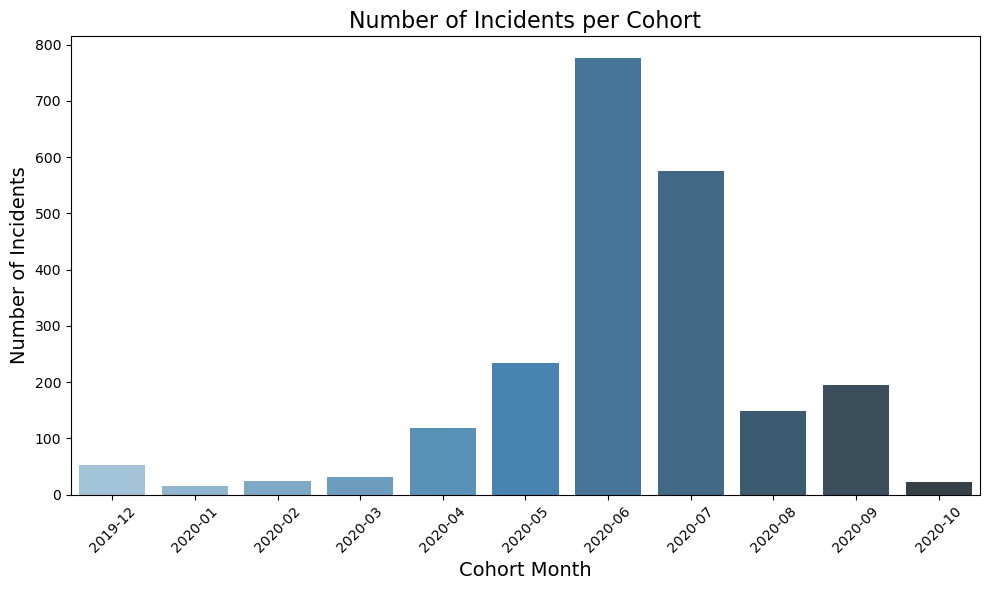

In [133]:
# Bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='cohort_month', y='type', data=incidents_cohort, palette='Blues_d')

# Adding titles and labels
plt.title('Number of Incidents per Cohort', fontsize=16)
plt.xlabel('Cohort Month', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

### Tasa de Incidentes - Parte 7 (Grafico)

Este script utiliza la biblioteca Seaborn para crear un gráfico de barras que muestra el número de incidentes por mes de cohorte:

1. **Configuración del Gráfico**: 
   - Se define el tamaño de la figura del gráfico con `plt.figure(figsize=(10, 6))`.

2. **Creación del Gráfico de Barras**: 
   - Se utiliza `sns.barplot` para crear un gráfico de barras donde el eje x representa los meses de cohorte (`cohort_month`) y el eje y muestra el número de incidentes (`type`), aplicando una paleta de colores `Blues_d`.

3. **Añadir Títulos y Etiquetas**: 
   - Se añaden un título al gráfico y etiquetas a los ejes x e y para mayor claridad.

4. **Mejorar la Legibilidad**: 
   - Se rotan las etiquetas del eje x utilizando `plt.xticks(rotation=45)` para facilitar la lectura.

5. **Agregar Conteo sobre Cada Barra**: 
   - Se añade un conteo sobre cada barra utilizando un bucle que itera sobre los parches (`ax.patches`) y coloca el número de incidentes encima de cada barra.

6. **Mostrar el Gráfico**: 
   - Se utiliza `plt.tight_layout()` para ajustar el diseño y `plt.show()` para visualizar el gráfico.


C:\Users\Davi\AppData\Local\Temp\ipykernel_24344\1005268704.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='cohort_month', y='type', data=incidents_cohort, palette='Blues_d')


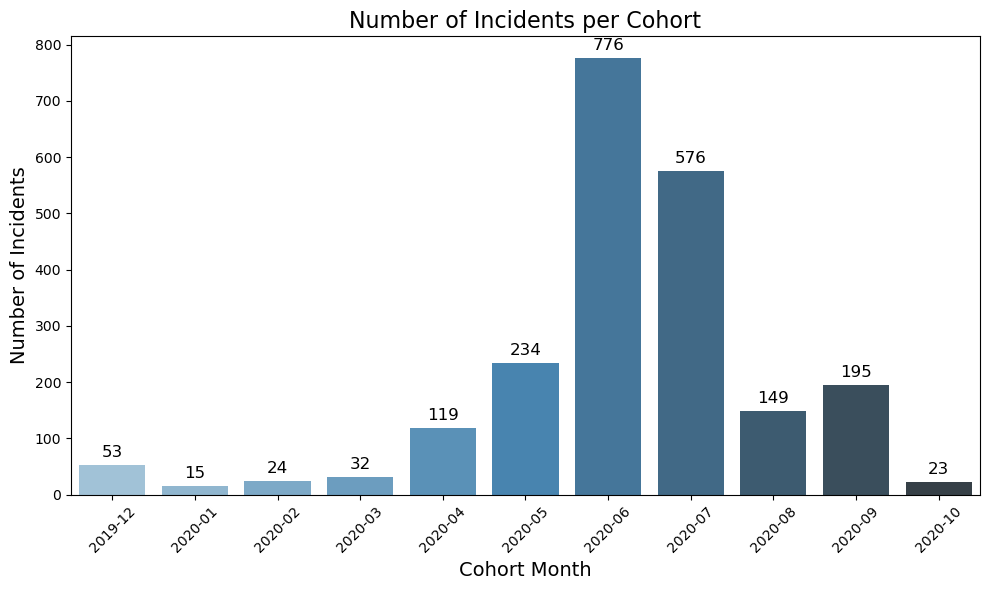

In [135]:
# Bar plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='cohort_month', y='type', data=incidents_cohort, palette='Blues_d')

# Adding titles and labels
plt.title('Number of Incidents per Cohort', fontsize=16)
plt.xlabel('Cohort Month', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Adding the count on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points', fontsize=12)

plt.tight_layout()
plt.show()


### Ingresos Generados por la Cohorte (Grafico)

Este script realiza un análisis de los ingresos generados por cohortes, utilizando la biblioteca Seaborn para visualizar los datos mediante un gráfico de barras:

1. **Filtrado de Datos**: 
   - Se filtran los datos de `data_merged` para excluir las solicitudes con estado 'rejected' y se agrupan por mes de cohorte (`cohort_month`) para sumar los ingresos totales (`total_amount`). 

2. **Visualización de Ingresos**:
   - Se crea un gráfico de barras con `sns.barplot`, donde el eje x representa los meses de cohorte y el eje y muestra el total de ingresos generados, utilizando una paleta de colores `Blues_d`.

3. **Añadir Títulos y Etiquetas**: 
   - Se añaden un título al gráfico y etiquetas a los ejes x e y para facilitar la comprensión de los datos.

4. **Mejorar la Legibilidad**: 
   - Las etiquetas del eje x se rotan con `plt.xticks(rotation=45)` para mejorar la legibilidad.

5. **Agregar Valores sobre Cada Barra**: 
   - Se añade un valor monetario sobre cada barra utilizando un bucle que itera sobre los parches (`ax.patches`) y coloca el total de ingresos encima de cada barra, formateando los números como moneda.

6. **Mostrar el Gráfico**: 
   - Se utiliza `plt.tight_layout()` para ajustar el diseño y `plt.show()` para visualizar el gráfico.


In [138]:
# Tercer ejercicio

ingresos_generados = data_merged[data_merged['status_x'] != 'rejected'].groupby('cohort_month')['total_amount'].sum().reset_index()

ingresos_generados.head()


,cohort_month,total_amount
0,2019-11,50.0
1,2019-12,1495.0
2,2020-01,630.0
3,2020-02,930.0
4,2020-03,845.0


C:\Users\Davi\AppData\Local\Temp\ipykernel_24344\807991564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='cohort_month', y='total_amount', data=ingresos_generados, palette='Blues_d')


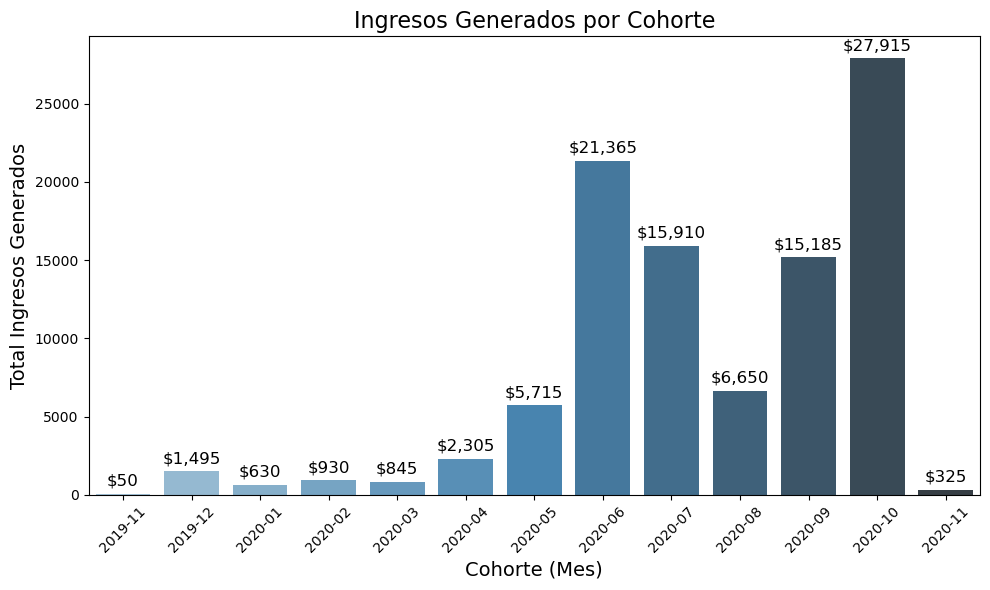

In [139]:
# Bar plot usando seaborn para los ingresos generados por cohorte
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='cohort_month', y='total_amount', data=ingresos_generados, palette='Blues_d')

# Añadir títulos y etiquetas
plt.title('Ingresos Generados por Cohorte', fontsize=16)
plt.xlabel('Cohorte (Mes)', fontsize=14)
plt.ylabel('Total Ingresos Generados', fontsize=14)

# Rotar las etiquetas de la cohorte en el eje X para mejor legibilidad
plt.xticks(rotation=45)

# Añadir los valores encima de cada barra
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}',  # Formato para moneda
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points', fontsize=12)

plt.tight_layout()
plt.show()


### Nueva Métrica Relevante - Parte 1

Este script calcula el promedio de ingresos generados por cada `user_id` en cada mes de cohorte (`cohort_month`), excluyendo las solicitudes con estado 'rejected':

1. **Filtrado de Datos**: 
   - Se filtran los datos de `data_merged` para excluir las solicitudes con estado 'rejected'.

2. **Cálculo del Promedio**:
   - Se agrupan los datos por `id` (user_id) y `cohort_month`, y se calcula el promedio de `total_amount` utilizando la función `mean()`.

3. **Reinicio de Índice**:
   - Se utiliza `reset_index()` para convertir el resultado en un DataFrame con un índice por defecto.

4. **Visualización de Resultados**:
   - Se muestra el encabezado del DataFrame resultante con `avg_user_cohort.head()`, que incluye el promedio de ingresos por usuario en cada mes de cohorte.


In [141]:
# Avg de ingresos per user_id per cohort_month

avg_user_cohort = data_merged[data_merged['status_x'] != 'rejected'].groupby(["id","cohort_month"])['total_amount'].mean().reset_index()

avg_user_cohort.head()

,id,cohort_month,total_amount
0,1,2020-04,5.0
1,2,2020-05,5.0
2,3,2020-01,5.0
3,4,2020-04,5.0
4,5,2020-06,5.0


### Nueva Métrica Relevante - Parte 2 (Grafico)

Este script realiza un análisis de cohortes para calcular el monto promedio total por usuario según el mes de cohorte y el mes de solicitud, utilizando un mapa de calor:

1. **Filtrado de Datos**:
   - Se filtran los datos de `data_merged` para excluir las solicitudes con estado 'rejected'.

2. **Cálculo del Promedio**:
   - Se agrupan los datos por `cohort_month` y `request_month`, y se calcula el monto promedio de `total_amount` utilizando la función `mean()`.

3. **Transformación para el Mapa de Calor**:
   - Se utiliza la función `pivot()` para reorganizar los datos en una matriz, que servirá de base para el mapa de calor.

4. **Creación del Mapa de Calor**:
   - Usando `seaborn`, se crea un mapa de calor que muestra el promedio de montos totales por cohorte y mes de solicitud.

5. **Etiquetas y Título**:
   - Se añaden etiquetas a los ejes y un título a la gráfica para facilitar su interpretación.

6. **Ajuste del Diseño**:
   - Se asegura que el diseño se ajuste correctamente a la ventana de visualización con `plt.tight_layout()`.

7. **Visualización del Gráfico**:
   - Finalmente, el gráfico se muestra utilizando `plt.show()`.


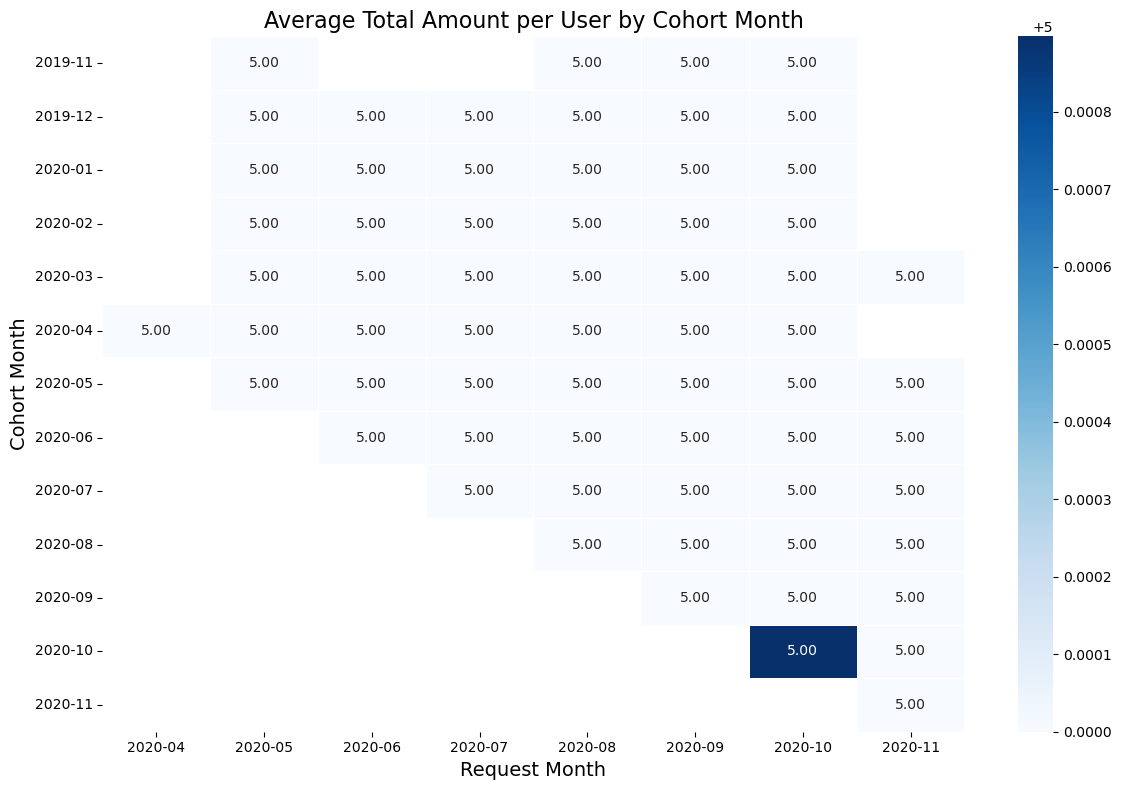

In [143]:

# Assuming `data_merged` is the DataFrame that has been created from merging the cash requests and fees
# Step 1: Filter out rejected statuses
filtered_data = data_merged[data_merged['status_x'] != 'rejected']

# Step 2: Calculate the average total amount per cohort month and request month
avg_user_cohort = filtered_data.groupby(["cohort_month", "request_month"])['total_amount'].mean().reset_index()

# Step 3: Pivot the data to create a matrix for the heatmap
heatmap_data = avg_user_cohort.pivot(index='cohort_month', columns='request_month', values='total_amount')

# Step 4: Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".2f", linewidths=0.5)

# Step 5: Add labels and title
plt.title('Average Total Amount per User by Cohort Month', fontsize=16)
plt.xlabel('Request Month', fontsize=14)
plt.ylabel('Cohort Month', fontsize=14)

# Ensure the layout fits the plot nicely
plt.tight_layout()
plt.show()


### Conclusiones

1. **Incidentes por Cohorte**:
   - El análisis de cohortes mostró el número de incidentes (solicitudes problemáticas) a lo largo del tiempo, agrupados por el mes en que los usuarios hicieron su primera solicitud (mes de cohorte). Este análisis ayuda a visualizar si los usuarios que ingresaron en ciertos meses experimentaron más problemas en comparación con otros.
   - Una observación clave podría ser identificar en qué cohortes se concentra un mayor número de incidentes, lo que puede dar pistas sobre cambios en el comportamiento de los usuarios o posibles problemas internos en ciertos periodos.
2. **Ingresos Generados por Cohorte**:
   - El análisis de ingresos generados mostró cómo varía el monto total recaudado según la cohorte de usuarios. Esto permite observar qué cohortes (meses en los que los usuarios hicieron su primera solicitud) generaron más ingresos para la empresa.
   - Este análisis puede ayudar a identificar cuáles fueron las cohortes más valiosas y si existe una relación entre el ingreso generado y el tiempo de permanencia de los usuarios.
3. **Promedio de Ingresos por Usuario y Mes**:
   - Se calculó el ingreso promedio por usuario por cohorte, lo que proporciona una visión detallada de cuánto, en promedio, está generando cada cohorte de usuarios mes a mes.
   - Esto ayuda a identificar el valor a largo plazo de los usuarios: por ejemplo, si los ingresos promedio por usuario disminuyen con el tiempo o si hay cohortes específicas que son más rentables que otras.
4. **Mapa de Calor de Ingresos Promedio**:
   - El mapa de calor muestra visualmente cómo se distribuyen los ingresos promedio según el mes de cohorte y el mes en que los usuarios realizaron sus solicitudes. Esta herramienta es útil para detectar patrones o tendencias en la generación de ingresos a lo largo del tiempo.
   - Un mapa de calor puede revelar si los usuarios tienden a generar más ingresos en sus primeros meses de uso o si existe un patrón diferente, como un aumento de ingresos después de cierto tiempo de uso.

